<a href="https://colab.research.google.com/github/oxayavongsa/aai-590-capstone-mental-health/blob/main/clean_filtered_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health Risk Detection

## Cleaning and Inspecting Original Data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv("aai-590-capstone-mental-health/data-assets/Mental Health Dataset.csv")
#df = pd.read_csv("./data-assets/Mental Health Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AAI-590/final/aai-590-capstone-mental-health/data-assets/Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
print("\nShape: ", df.shape)
print("\nColumns:")
for col in df.columns:
    print(f" - {col}")

print("\nData Types:\n", df.dtypes)


Shape:  (292364, 17)

Columns:
 - Timestamp
 - Gender
 - Country
 - Occupation
 - self_employed
 - family_history
 - treatment
 - Days_Indoors
 - Growing_Stress
 - Changes_Habits
 - Mental_Health_History
 - Mood_Swings
 - Coping_Struggles
 - Work_Interest
 - Social_Weakness
 - mental_health_interview
 - care_options

Data Types:
 Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object


In [5]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())

Missing values per column:
Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

Duplicates: 2313


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# All columns except Timestamp to category
cat_cols = [col for col in df.columns if col != 'Timestamp']
df[cat_cols] = df[cat_cols].astype('category')

print("\nData Types after conversion:\n", df.dtypes)


Data Types after conversion:
 Timestamp                  datetime64[ns]
Gender                           category
Country                          category
Occupation                       category
self_employed                    category
family_history                   category
treatment                        category
Days_Indoors                     category
Growing_Stress                   category
Changes_Habits                   category
Mental_Health_History            category
Mood_Swings                      category
Coping_Struggles                 category
Work_Interest                    category
Social_Weakness                  category
mental_health_interview          category
care_options                     category
dtype: object


In [7]:
# Remove duplicates
df = df.drop_duplicates()

# Remove NaN values
df = df.dropna()

print("\n Shape after cleaning: ", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


 Shape after cleaning:  (284858, 17)

Missing values after cleaning:
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [8]:
df.describe(include='all')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858
unique,NaN,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,NaN,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,NaN,234000,165869,64728,255711,172357,143331,61994,97540,106844,101474,98592,150318,103136,100746,227036,115233
mean,2014-09-09 11:47:30.245174784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2014-08-27 11:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2014-08-27 14:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2014-08-28 03:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014-08-28 23:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2016-02-01 23:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset consists of 284,858 responses spanning from 2014 to 2016, with a strong male skew and a majority of participants from the United States. Most variables are categorical, with "Housewife" being the top occupation. Responses tend to be binary ("Yes"/"No"), suggesting a survey-based format. No true numerical variables are present for statistical summary beyond frequencies.

In [9]:
# Print the df to verify all cleaning steps
print("\nCleaned DataFrame:")
df.head()


Cleaned DataFrame:


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


## Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns


=== Gender ===


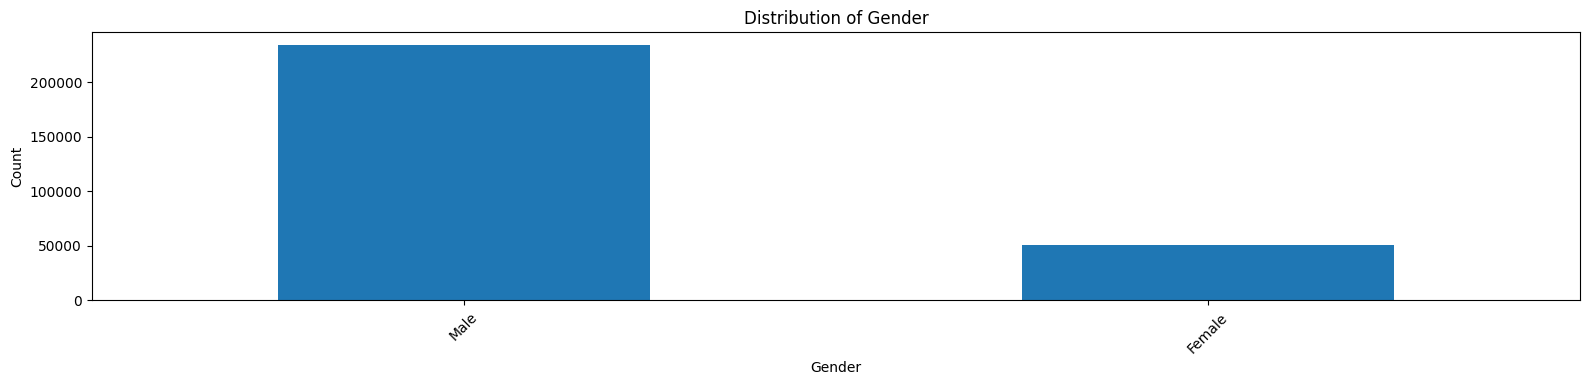


=== Country ===


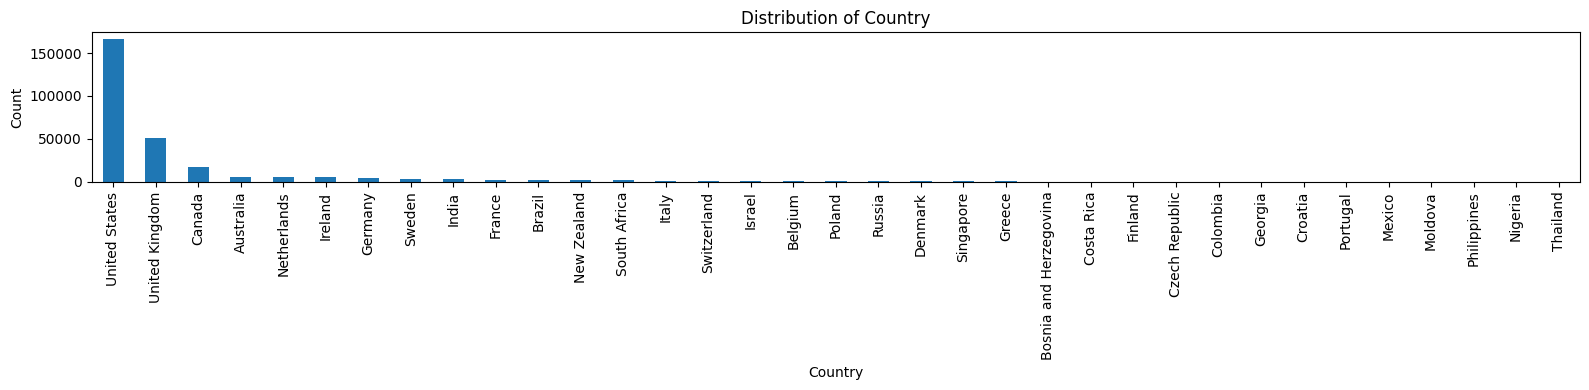


=== Occupation ===


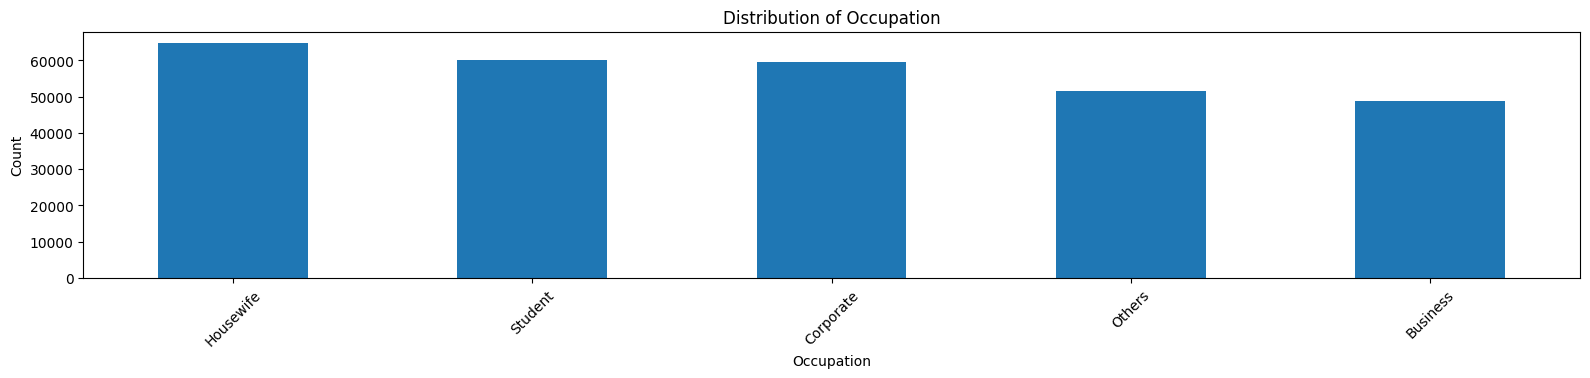


=== self_employed ===


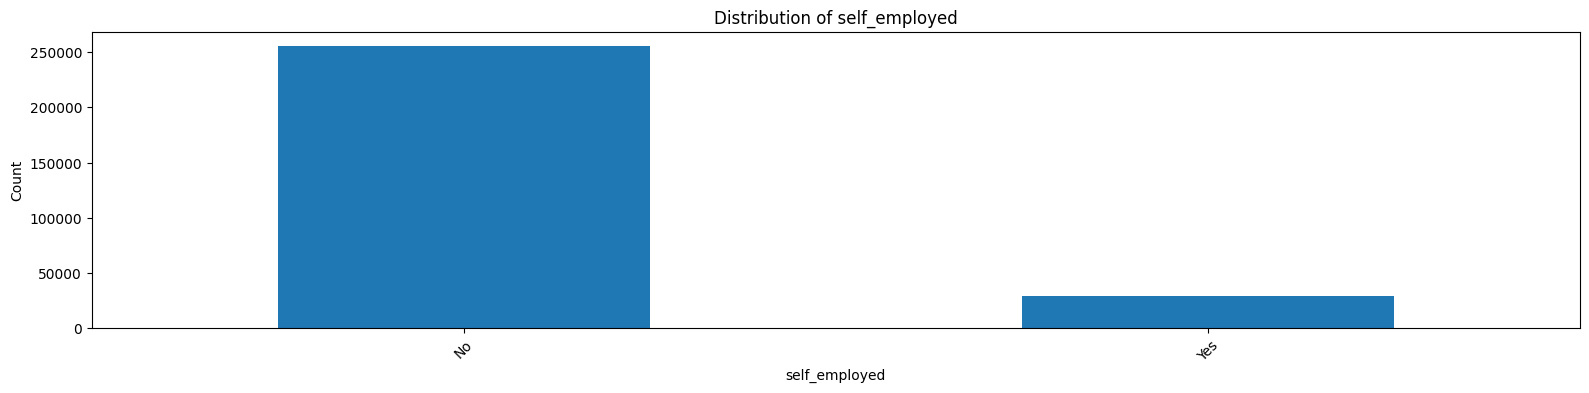


=== family_history ===


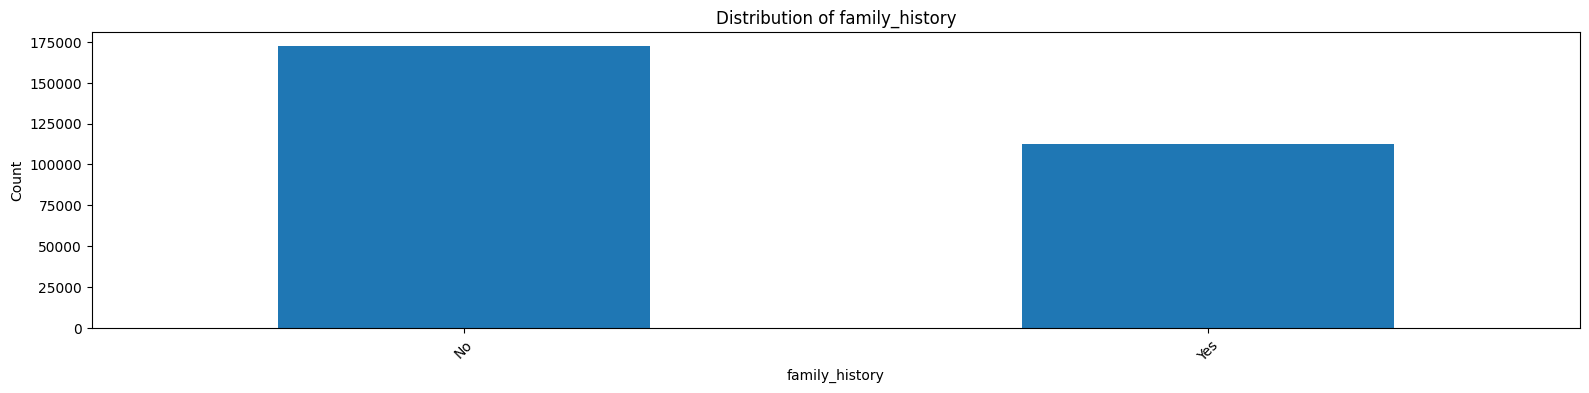


=== treatment ===


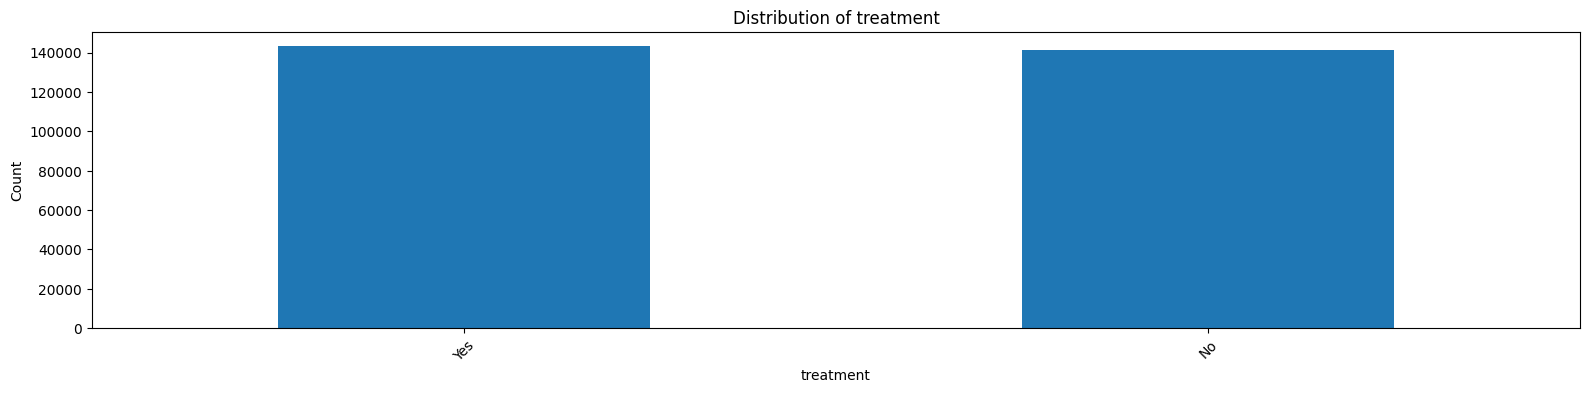


=== Days_Indoors ===


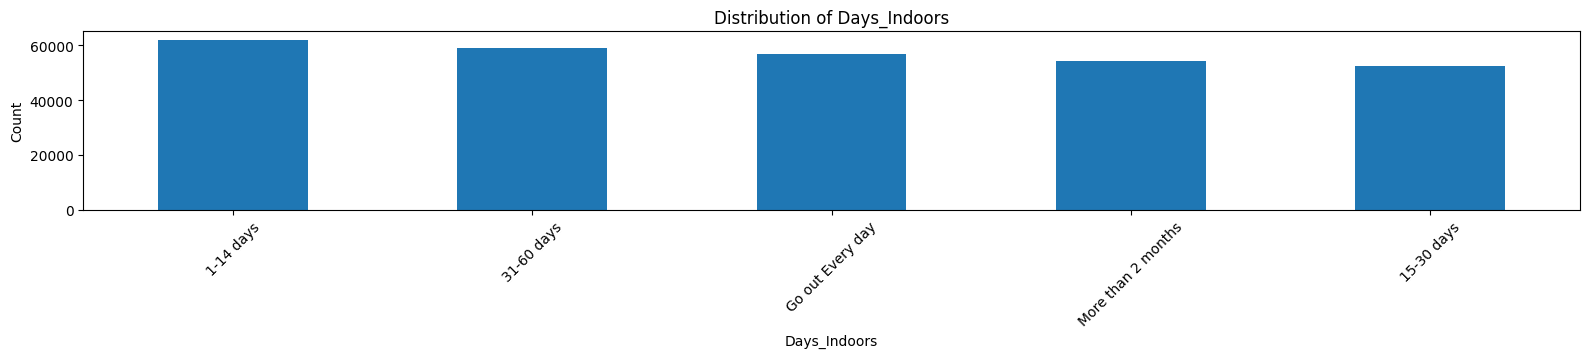


=== Growing_Stress ===


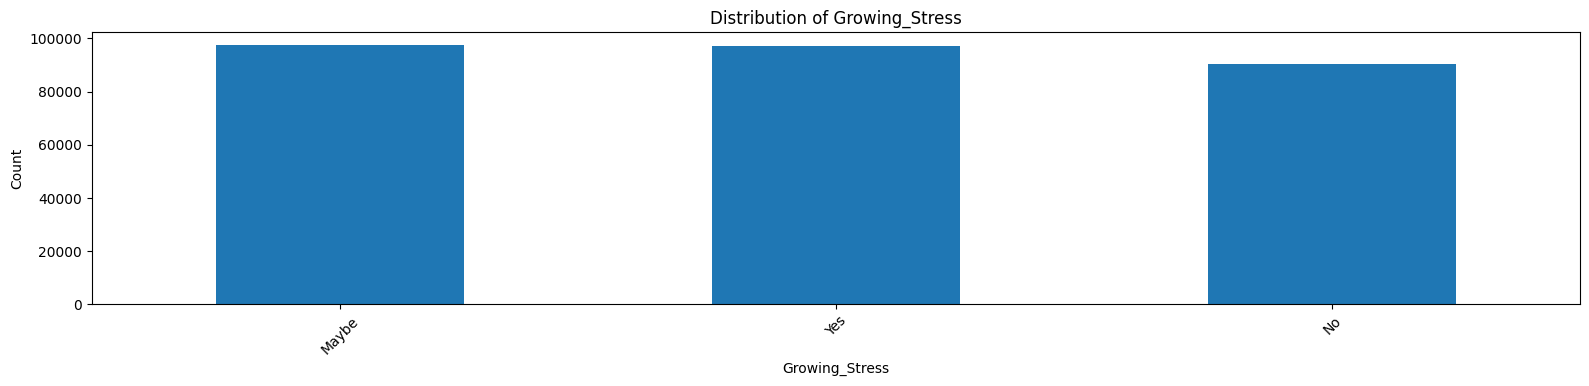


=== Changes_Habits ===


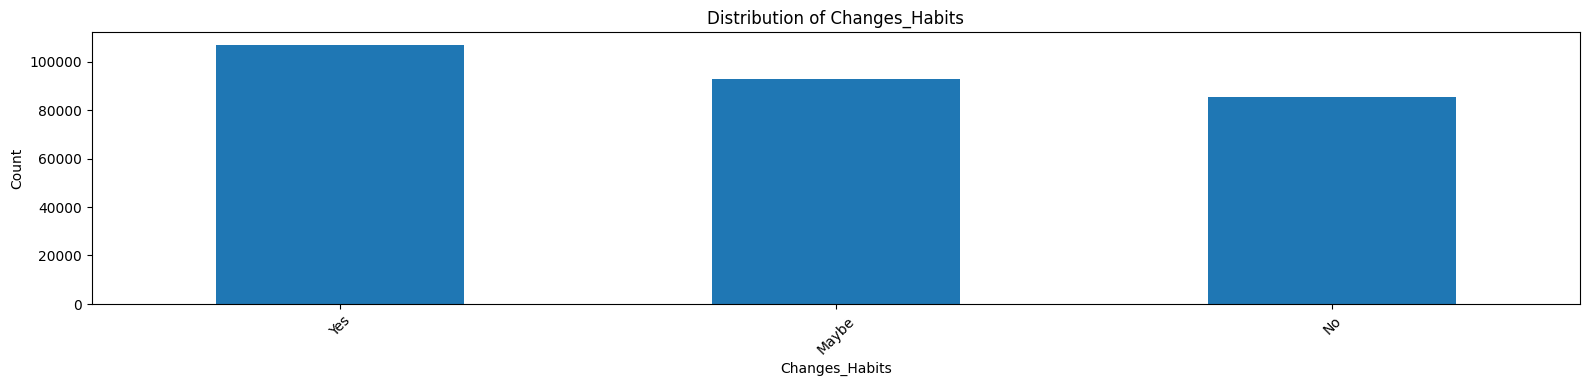


=== Mental_Health_History ===


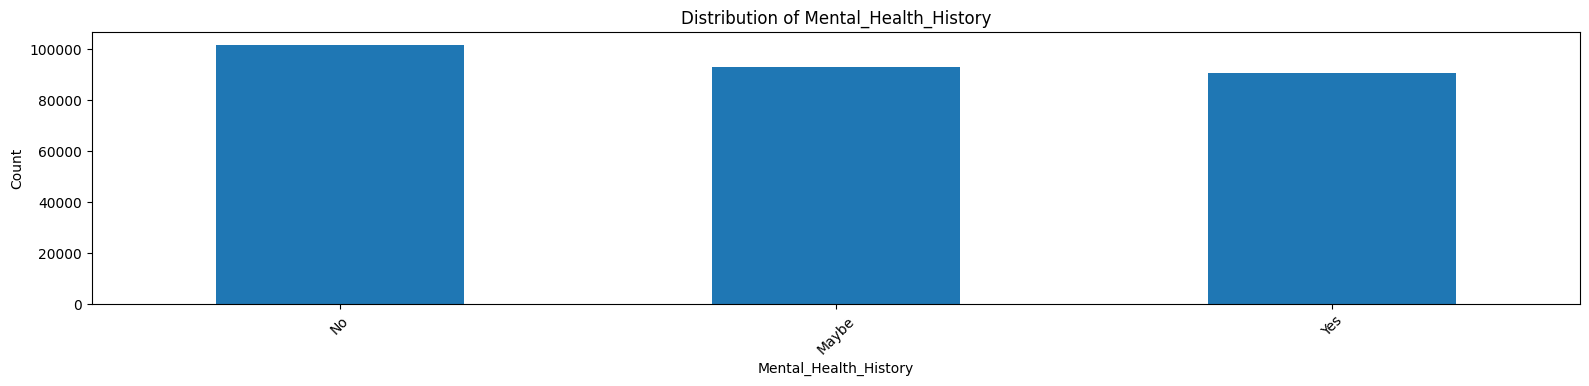


=== Mood_Swings ===


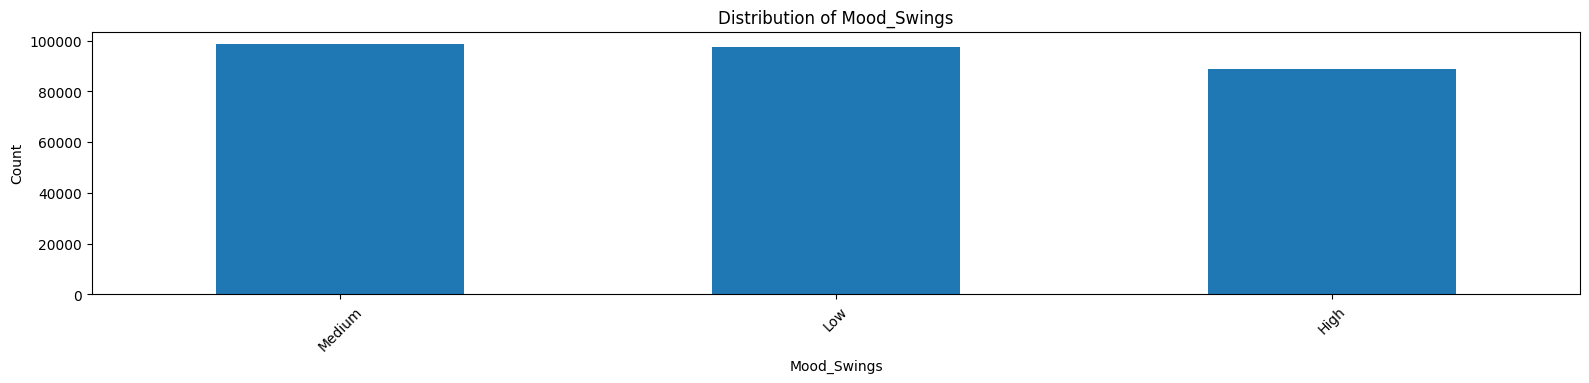


=== Coping_Struggles ===


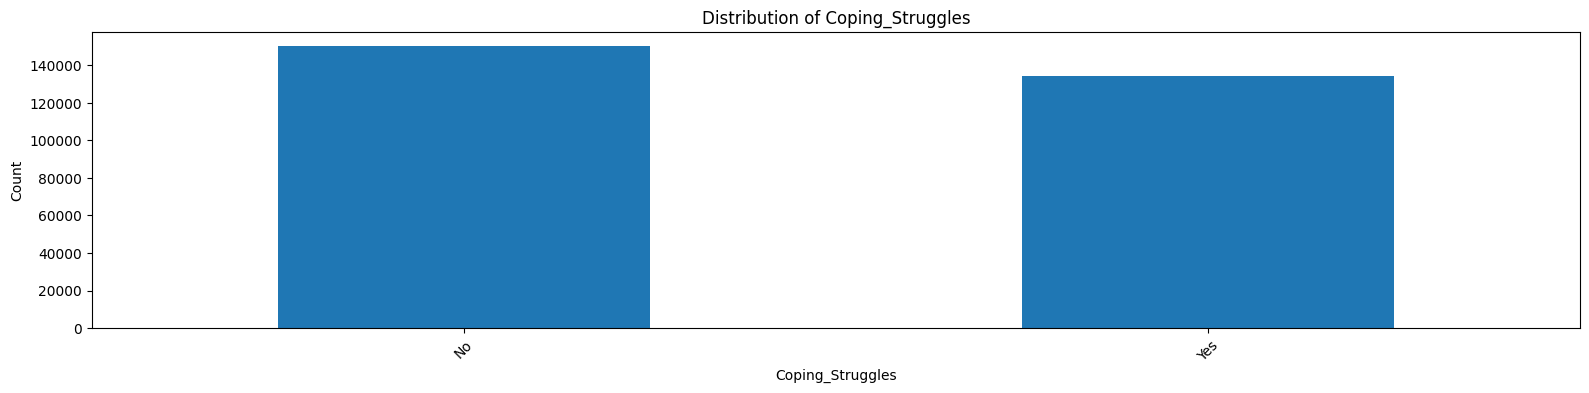


=== Work_Interest ===


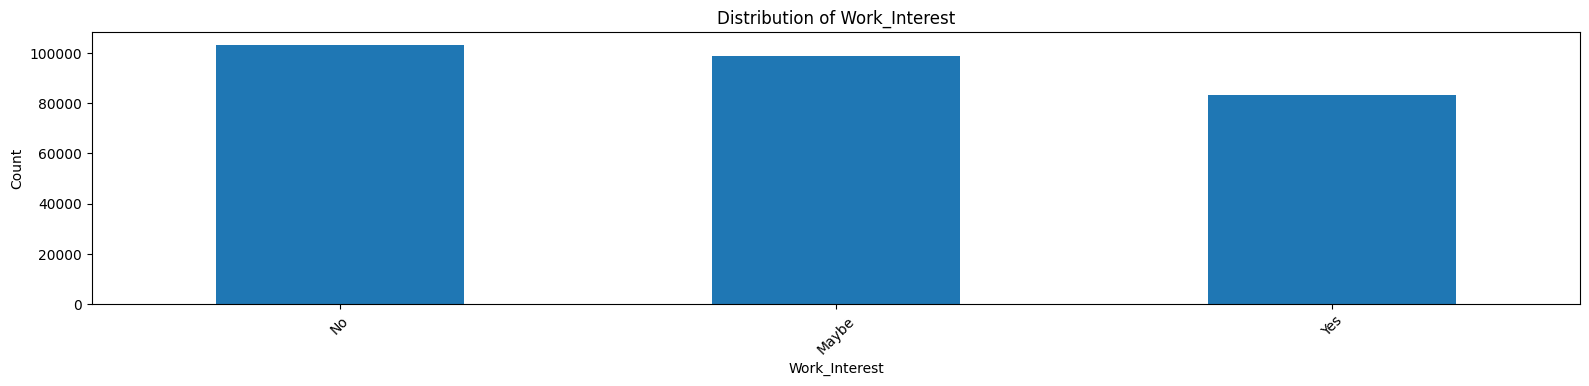


=== Social_Weakness ===


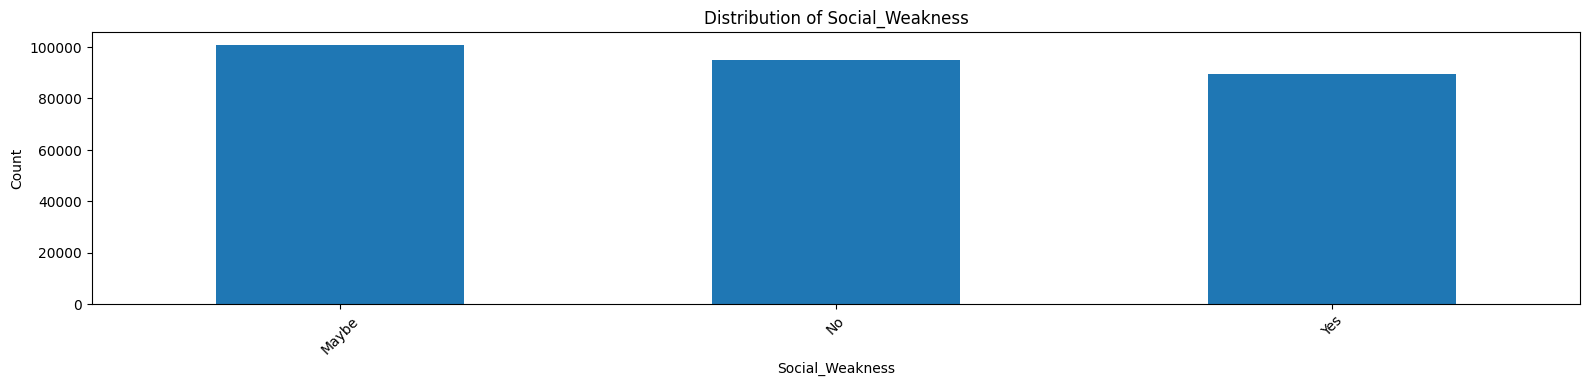


=== mental_health_interview ===


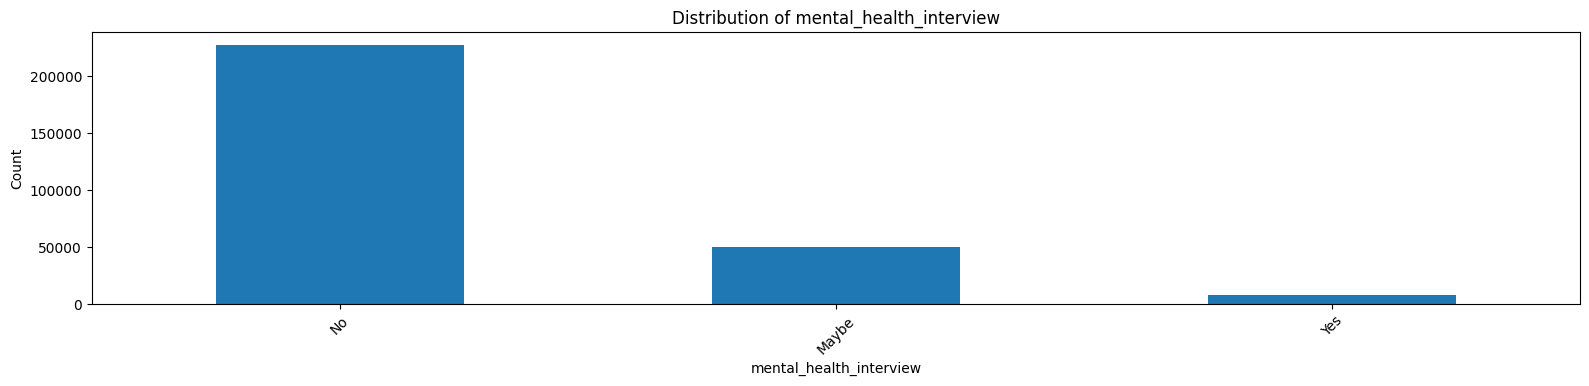


=== care_options ===


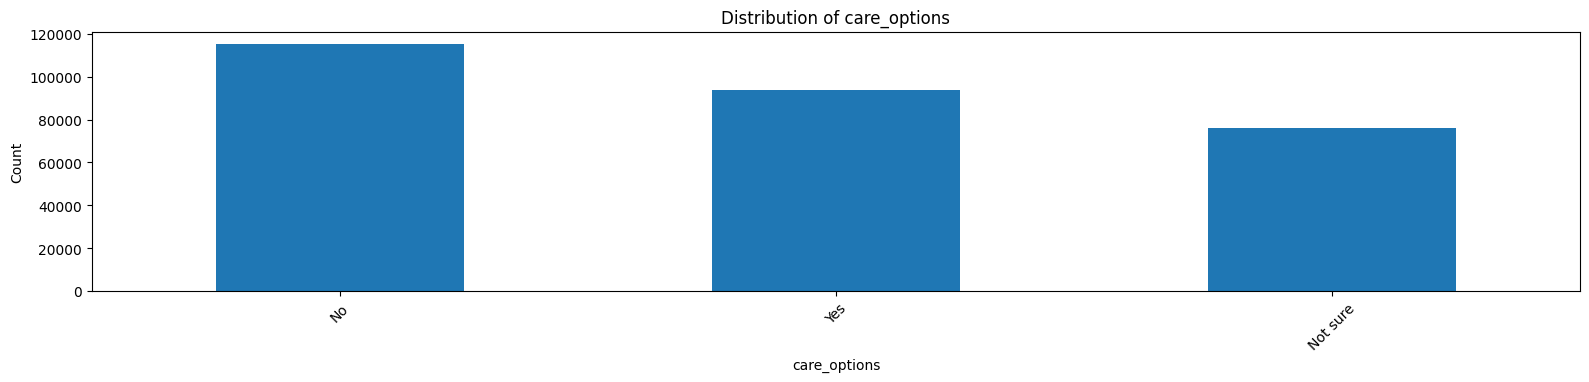

In [11]:
for col in cat_cols:
    print(f"\n=== {col} ===")
    plt.figure(figsize=(16, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    if col.lower() == "country":
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    plt.show()

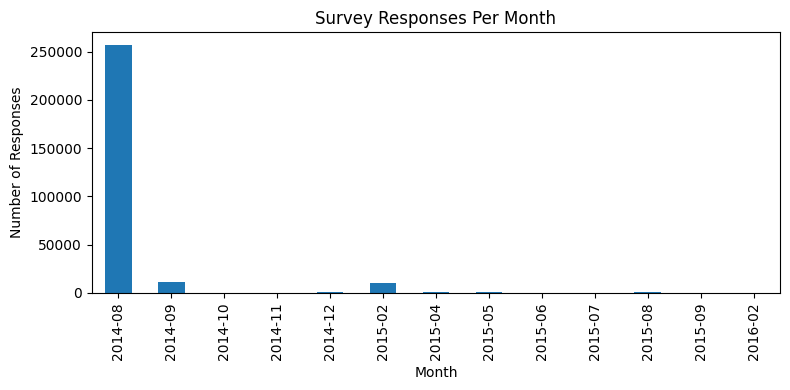

In [12]:
# Extract month (year and month)
df['Month'] = df['Timestamp'].dt.to_period('M')

monthly_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8,4))
monthly_counts.plot(kind='bar')
plt.title('Survey Responses Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

# drop the 'Month' column
df.drop(columns=['Month'], inplace=True)

**Cramer's V Heatmap**

In [13]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix, correction=False)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cat_cols = [col for col in df.columns if str(df[col].dtype) == 'category']

# Initialize an empty DataFrame for the association matrix
assoc_matrix = pd.DataFrame(np.ones((len(cat_cols), len(cat_cols))),
                            index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            assoc_matrix.loc[col1, col2] = 1.0
        else:
            assoc_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

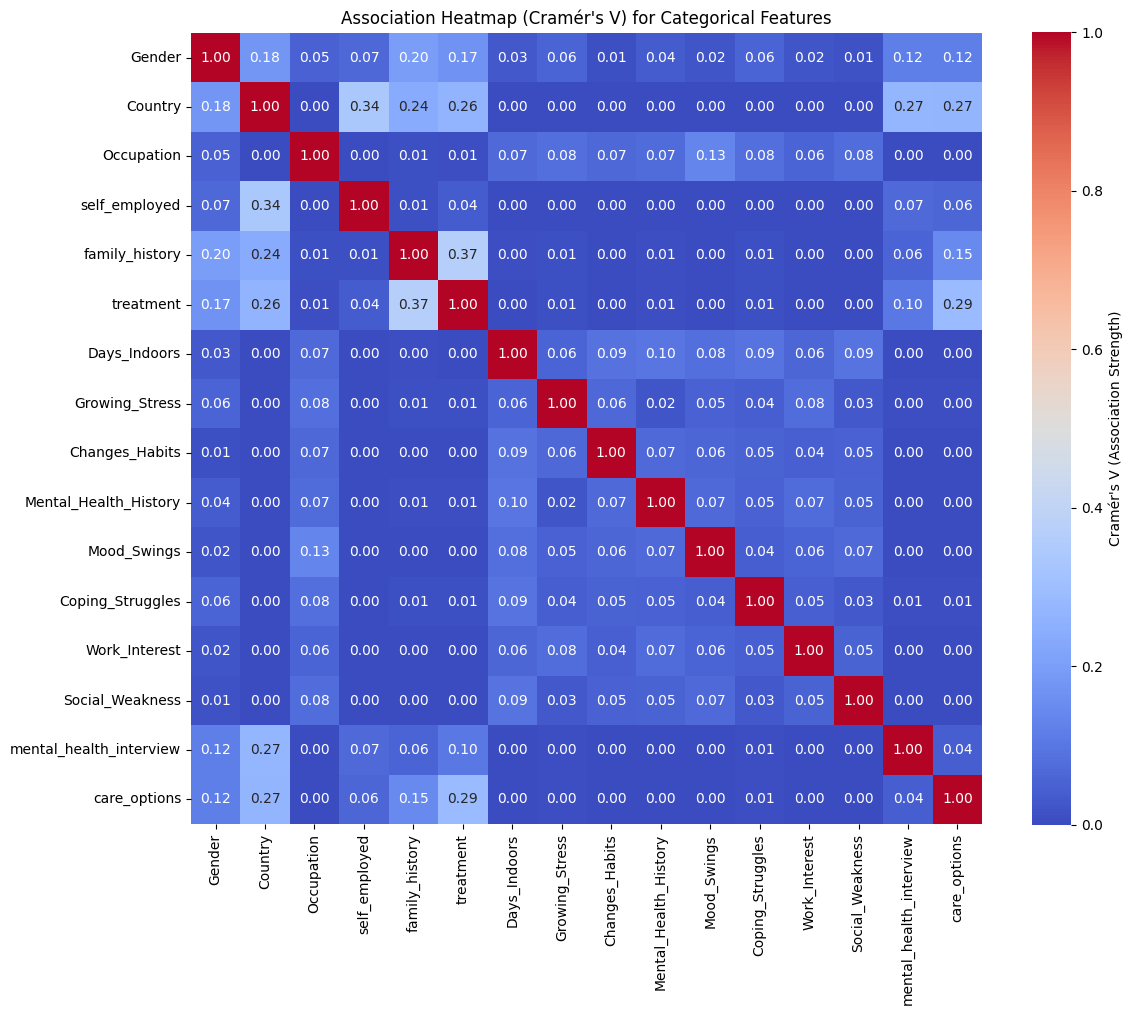

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(assoc_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={'label': "Cramér's V (Association Strength)"})
plt.title("Association Heatmap (Cramér's V) for Categorical Features")
plt.tight_layout()
plt.show()


Country vs. self_employed:
 self_employed               No   Yes
Country                             
Australia                 5234   780
Belgium                    821     0
Bosnia and Herzegovina     390     0
Brazil                    1560   780
Canada                   14676  2853
Colombia                   390     0
Costa Rica                 390     0
Croatia                      0   390
Czech Republic             390     0
Denmark                      0   780
Finland                    390     0
France                    1950   390
Georgia                    390     0
Germany                   3510  1170
Greece                     780     0
India                     2381   390
Ireland                   3592  1950
Israel                    1560     0
Italy                     1560     0
Mexico                       0   390
Moldova                    390     0
Netherlands               4721  1170
New Zealand               1991     0
Nigeria                    390     0
Philippin

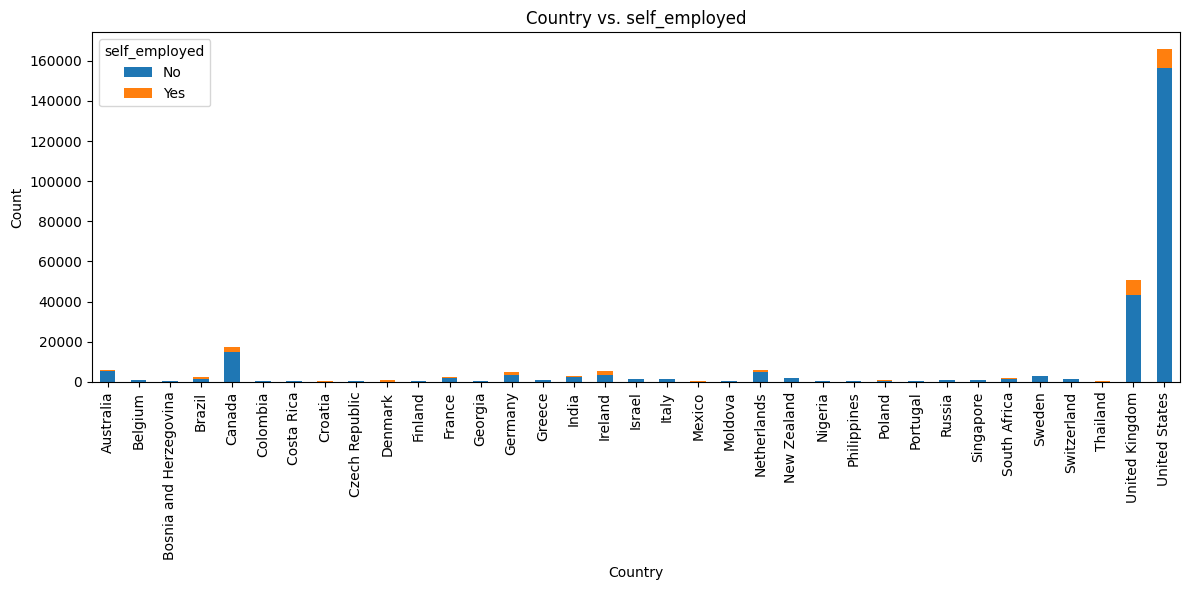


Occupation vs. self_employed:
 self_employed     No   Yes
Occupation                
Business       43947  4975
Corporate      53408  6206
Housewife      58093  6635
Others         46212  5218
Student        54051  6113


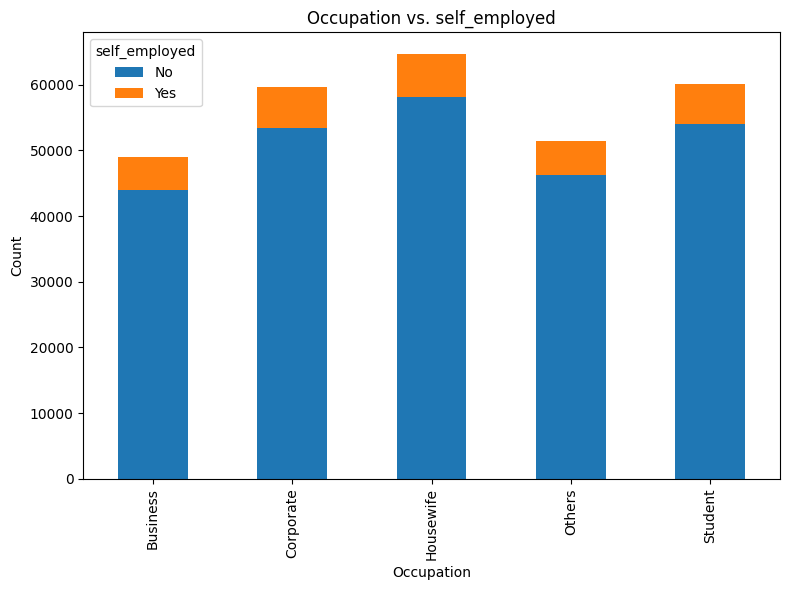


Country vs. Gender:
 Gender                  Female    Male
Country                               
Australia                 1724    4290
Belgium                    431     390
Bosnia and Herzegovina       0     390
Brazil                       0    2340
Canada                    3879   13650
Colombia                     0     390
Costa Rica                   0     390
Croatia                      0     390
Czech Republic               0     390
Denmark                      0     780
Finland                      0     390
France                       0    2340
Georgia                      0     390
Germany                      0    4680
Greece                       0     780
India                      431    2340
Ireland                    862    4680
Israel                       0    1560
Italy                        0    1560
Mexico                       0     390
Moldova                      0     390
Netherlands                431    5460
New Zealand                431    1560
Nig

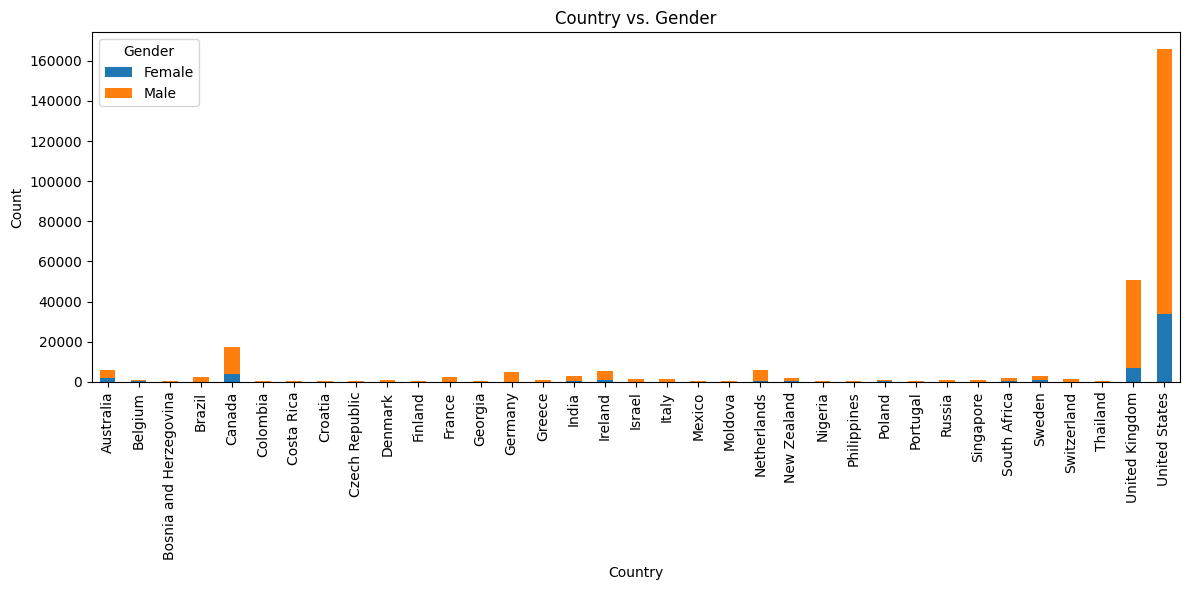


Country vs. family_history:
 family_history             No    Yes
Country                             
Australia                3120   2894
Belgium                   821      0
Bosnia and Herzegovina      0    390
Brazil                   1560    780
Canada                   9832   7697
Colombia                  390      0
Costa Rica                390      0
Croatia                   390      0
Czech Republic              0    390
Denmark                     0    780
Finland                   390      0
France                   1560    780
Georgia                   390      0
Germany                  3120   1560
Greece                    780      0
India                    2340    431
Ireland                  3161   2381
Israel                   1560      0
Italy                    1560      0
Mexico                    390      0
Moldova                   390      0
Netherlands              3551   2340
New Zealand              1170    821
Nigeria                   390      0
Philippi

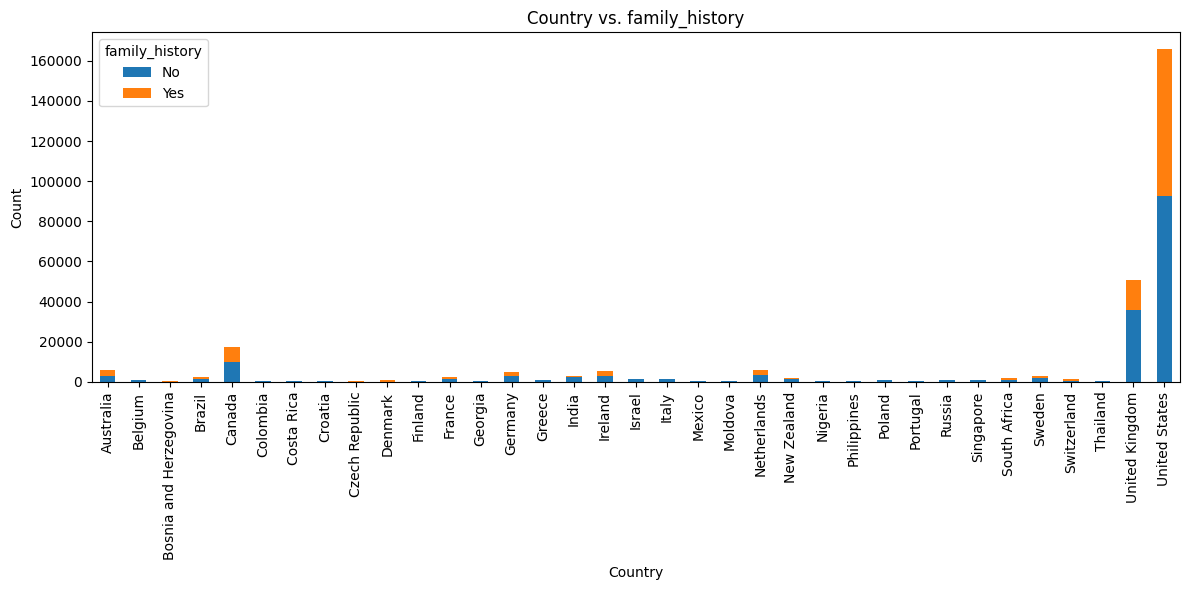

In [15]:
# 1. Country vs. self_employed
ctab1 = pd.crosstab(df['Country'], df['self_employed'])
print("\nCountry vs. self_employed:\n", ctab1)
ctab1.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Country vs. self_employed')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Occupation vs. self_employed
ctab2 = pd.crosstab(df['Occupation'], df['self_employed'])
print("\nOccupation vs. self_employed:\n", ctab2)
ctab2.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Occupation vs. self_employed')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Country vs. Gender (optional)
ctab3 = pd.crosstab(df['Country'], df['Gender'])
print("\nCountry vs. Gender:\n", ctab3)
ctab3.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Country vs. Gender')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Country vs. family_history (optional)
ctab4 = pd.crosstab(df['Country'], df['family_history'])
print("\nCountry vs. family_history:\n", ctab4)
ctab4.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Country vs. family_history')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The dataset is heavily dominated by the United States and United Kingdom, with the U.S. showing a balanced family history split and the U.K. slightly skewed toward those without it. Meanwhile, over 20 countries contribute only 390 responses each, often entirely male, highlighting artificial sampling, gender imbalance, and low statistical utility, which can compromise fairness, generalizability, and model robustness in global mental health predictions.

**Filter out countries with small or gender-skewed sample sizes to reduce bias**

In [16]:
# Get countries with ≥1,000 total responses
country_counts = df['Country'].value_counts()
top_countries = country_counts[country_counts >= 1000].index

# Get countries with ≥200 female and male respondents
gender_counts = df.groupby(['Country', 'Gender'], observed=False).size().unstack(fill_value=0)
balanced_countries = gender_counts[(gender_counts['Female'] >= 200) & (gender_counts['Male'] >= 200)].index

# Intersect both criteria
best_countries = sorted(set(top_countries) & set(balanced_countries))

# Filter the original DataFrame
df_filtered = df[df['Country'].isin(best_countries)].copy()

# Summary
print("\nOriginal shape:", df.shape)
print("Filtered shape:", df_filtered.shape)
print("\nFinal Selected Countries:")
for country in best_countries:
    print("-", country)
print(f"\nTotal Selected Countries: {len(best_countries)}")


Original shape: (284858, 17)
Filtered shape: (260986, 17)

Final Selected Countries:
- Australia
- Canada
- India
- Ireland
- Netherlands
- New Zealand
- South Africa
- Sweden
- United Kingdom
- United States

Total Selected Countries: 10


In [17]:
# Save filtered DataFrame to CSV
df_filtered.to_csv("/content/drive/MyDrive/Colab Notebooks/AAI-590/final/aai-590-capstone-mental-health/data-assets/test-mental-health.csv", index=False)

